In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('https://bit.ly/3C8JzrM', header=0)

In [4]:
x = data.values[:, :-1]
y = data.values[:, -1]
n = len(y)

In [5]:
seperator = 3

# kfold = KFold(n_splits=seperator, shuffle=True, random_state=7)
kfold = ShuffleSplit(n_splits=20, test_size=round(1/seperator,2), random_state=7)
model = LinearRegression()
result_cross_validation = cross_val_score(model, x, y, cv=kfold)


print('Mean value ({0:.3f}) and STD ({1:.3f}).'.format(result_cross_validation.mean(), result_cross_validation.std()))

Mean value (0.842) and STD (0.035).


In [6]:
highest_valid_index = list(result_cross_validation).index(max(result_cross_validation))
for i, (train_index, test_index) in enumerate(kfold.split(X=x)):
    if i == highest_valid_index:
        break
model.fit(x[train_index], y[train_index])
result_test = model.score(x[test_index], y[test_index])
print('Score for test set: {0:.3f}'.format(result_test))

Score for test set: 0.905


m for slope is [1.80001713] and b for bias is [2.80019335]


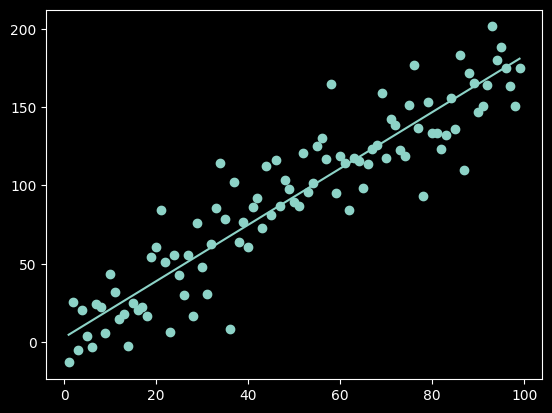

In [7]:
plt.scatter(x,y)
m = model.coef_.flatten()
b = model.intercept_.flatten()
print('m for slope is {0} and b for bias is {1}'.format(m, b))
fcn_predict = m * x + b
plt.plot(x,fcn_predict)

In [8]:
print('Version 1 mit scipy: Korrelationskoeffizient nach Pearson:')
print('{0}'.format(stats.pearsonr(x[:,0], y)))
r = stats.pearsonr(x[:,0], y)[0]

Version 1 mit scipy: Korrelationskoeffizient nach Pearson:
PearsonRResult(statistic=np.float64(0.9242100628677159), pvalue=np.float64(2.4452525699308e-42))


In [9]:
print('Version 2 mit pandas: Korrelationskoeffizient nach Pearson:')
print('{0}'.format(data.corr(method='pearson')))

Version 2 mit pandas: Korrelationskoeffizient nach Pearson:
         x        y
x  1.00000  0.92421
y  0.92421  1.00000


In [10]:
lower_cv = stats.t(n-1).ppf(0.025)
upper_cv = stats.t(n-1).ppf(0.975)

print('Lower and upper bounds of t-test: {0} / {1}'.format(lower_cv, upper_cv))

Lower and upper bounds of t-test: -1.9844674544266925 / 1.984467454426692


In [11]:
test_value = r / np.sqrt((1 - r ** 2) / (n - 2))

if test_value < lower_cv or test_value > upper_cv:
    print('Correlation is statiscally signifanct!')
else:
    print('Looser!')

Correlation is statiscally signifanct!


In [ ]:
data_log_reg = pd.read_csv('https://bit.ly/3imidqa')

x = data_log_reg.values[:, :-1]
y = data_log_reg.values[:, -1]
n = len(y)

kfold_log = KFold(n_splits=seperator, shuffle=True)
model_log = LogisticRegression(penalty=None)
result_cross_validation = cross_val_score(model, x, y, cv=kfold_log)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.33)
model_log.fit(X_train, Y_train)
y_prediction = model_log.predict(X_test)

confusion_ = confusion_matrix(y_true=Y_test, y_pred=y_prediction)
print(confusion_matrix)

print('Accuracy Mean:%.3f (stdev=%.3f)'% (result_cross_validation.mean(), result_cross_validation.std()))


<function confusion_matrix at 0x00000240B3998040>
Accuracy Mean:0.672 (stdev=0.016)
